In [8]:
import json
from pprint import pprint
from collect_data_helpers import *
import os
import random
from random import choices
from collections import OrderedDict
import itertools
import matplotlib.pyplot as plt
import numpy as np

random.seed(0)
num_of_runs = 5

In [9]:
def summary_plot_data(plot_data):
    file_names = sorted(list(plot_data.keys()))
    pipeline_names = list(plot_data[file_names[0]].keys())
    max_index = len(pipeline_names)
    def get_data(index):
        pipeline_name = pipeline_names[index]
        y = []
        for file_name in file_names:
            y.append(np.mean(plot_data[file_name][pipeline_name]))
        return pipeline_name, y
    return get_data, max_index, file_names


def create_plot(load_data, num_of_runs, plot_type, title, xlabel, ylabel):
    """
    plot_type: "mutation_score" or "coverage"
    """
    plot_data = {}
    for i in range(500):
        data = load_data(num_of_runs)
        for key, value in data.items():
            summary = cumulate_results(value)
            for result in summary:
                if result.filename not in plot_data:
                    plot_data[result.filename] = OrderedDict()
                if key not in plot_data[result.filename]:
                    plot_data[result.filename][key] = []
                if plot_type == "coverage":
                    score = result.coverage()
                elif plot_type == "mutation_score":
                    score = result.mutation_score()
                else:
                    raise ValueError("Invalid plot type")
                plot_data[result.filename][key].append(score)

    get_data, max_index, file_names = summary_plot_data(plot_data)
    bar_width = 0.1
    r1 = np.arange(len(file_names))
    plt.figure(figsize=(15,4))
    for index in range(max_index):
        name, y = get_data(index)
        plt.bar(r1 + index * bar_width, y, width=bar_width, label=f'{name}')

    plt.xticks([r + bar_width * int(max_index / 2) for r in range(len(file_names))], [x.split(".")[-1] for x in file_names], rotation=30)
    # plt.legend(loc='upper right', bbox_to_anchor=(0, 0.5))
    plt.legend(loc='upper right')
    # plt.legend()

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


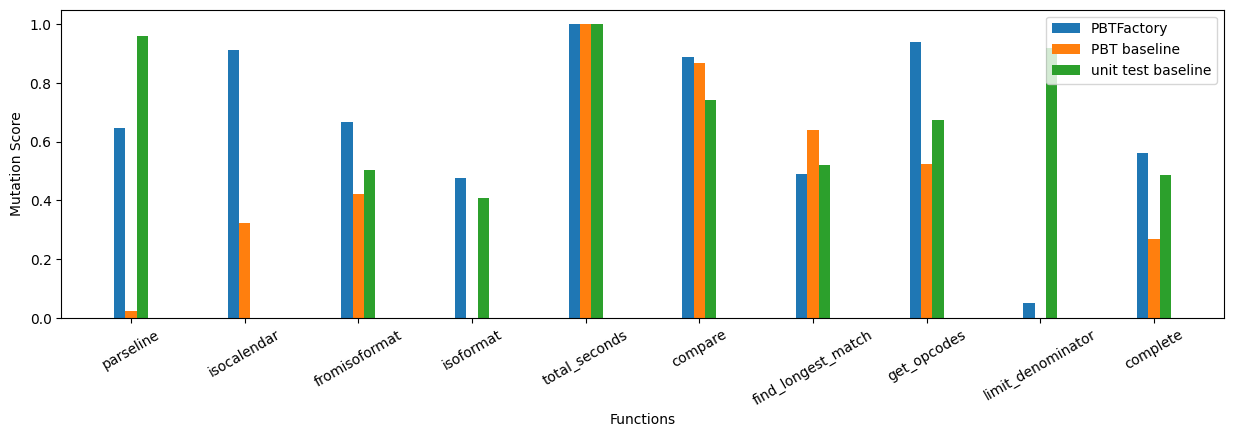

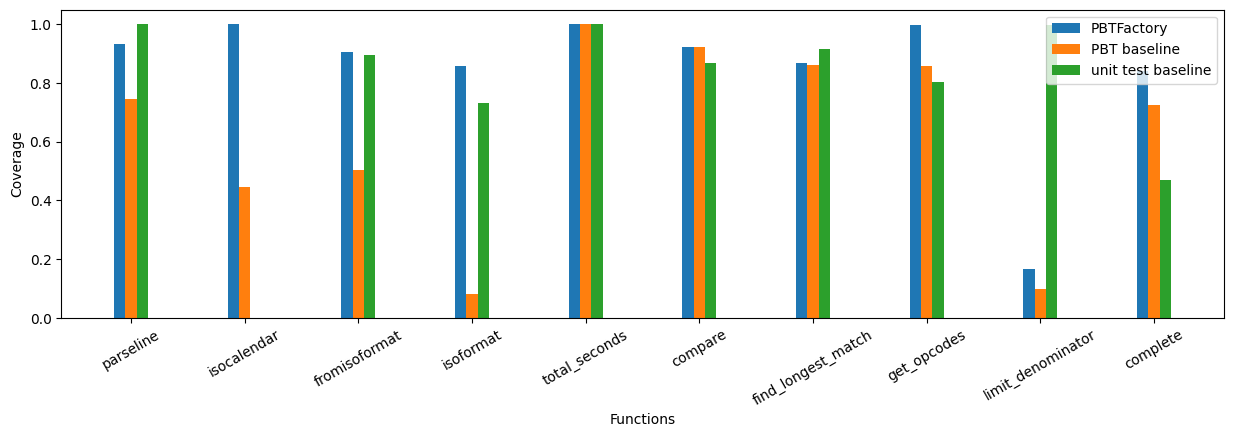

In [10]:
# Figure 1
def load_data(num_of_runs):
    data = OrderedDict()
    data["PBTFactory"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib", num_of_runs)
    data["PBT baseline"] = load_from_folder("result_pub/stdlib/pbt_baseline_stdlib", num_of_runs)
    data["unit test baseline"] = load_from_folder("result_pub/stdlib/unit_test_baseline_stdlib", num_of_runs)
    return data
    
create_plot(load_data, num_of_runs, "mutation_score", "", "Functions", "Mutation Score")
create_plot(load_data, num_of_runs, "coverage", "", "Functions", "Coverage")

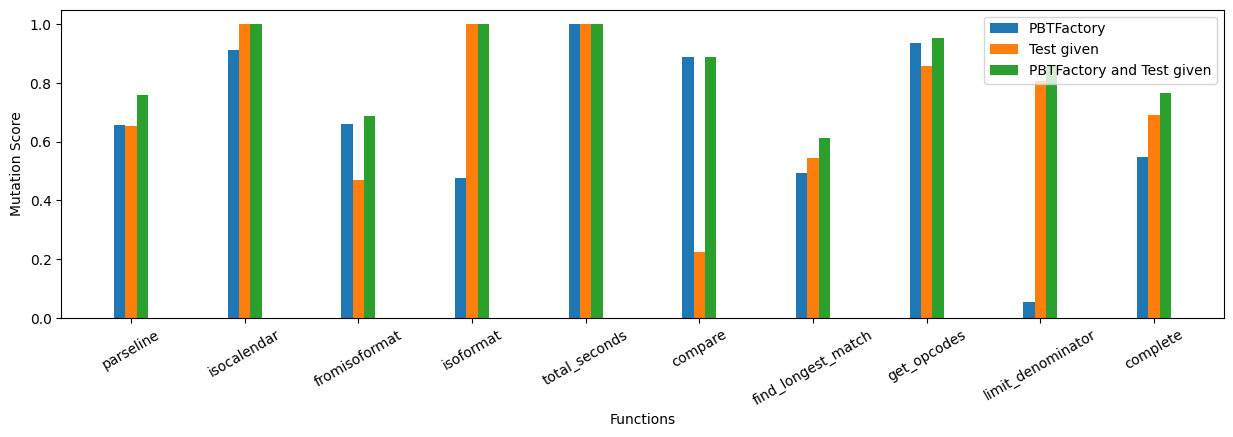

In [11]:
# Figure 2
def load_data(num_of_runs):
    data = OrderedDict()
    data["PBTFactory"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib", num_of_runs)
    data["Test given"] = load_from_folder("result_pub/stdlib/test_given_stdlib", 1)
    data["PBTFactory and Test given"] = data["PBTFactory"] + data["Test given"]
    return data
    
create_plot(load_data, num_of_runs, "mutation_score", "", "Functions", "Mutation Score")


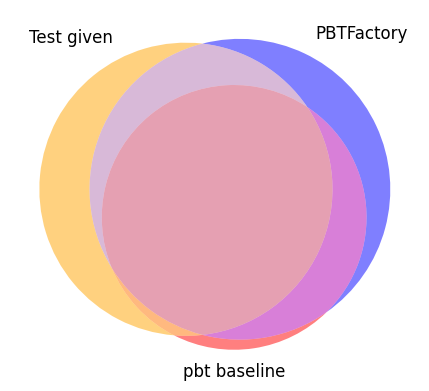

In [12]:
# Figure 3
from matplotlib_venn import venn3
venn_diagram = venn3(subsets=(15, 10, 10, 1, 1, 10, 50),  
      set_labels=('Test given', 'PBTFactory', 'pbt baseline'),  
      set_colors=("orange", "blue", "red"), alpha=0.5) 
for subset in venn_diagram.subset_labels:
    if subset:
        subset.set_visible(False)

plt.title("")
plt.show()


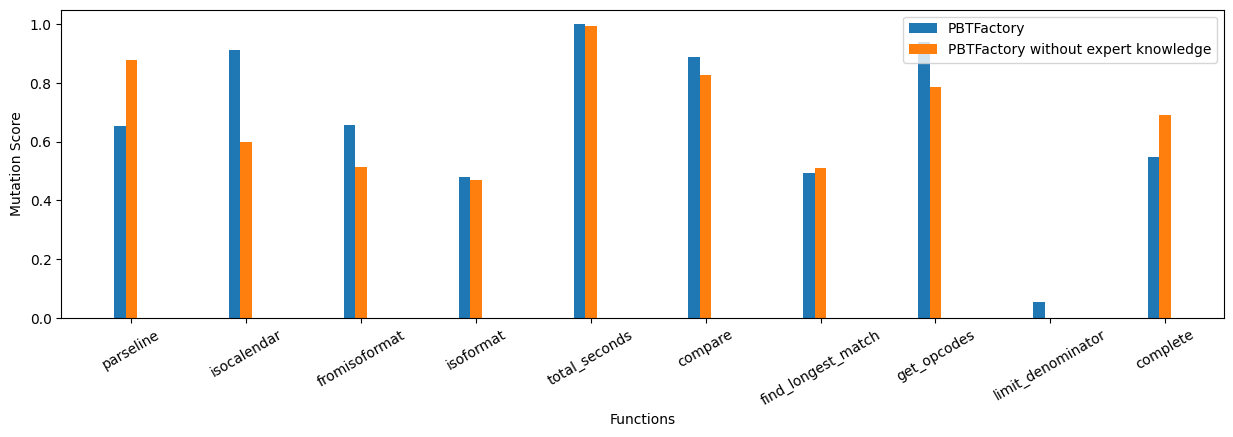

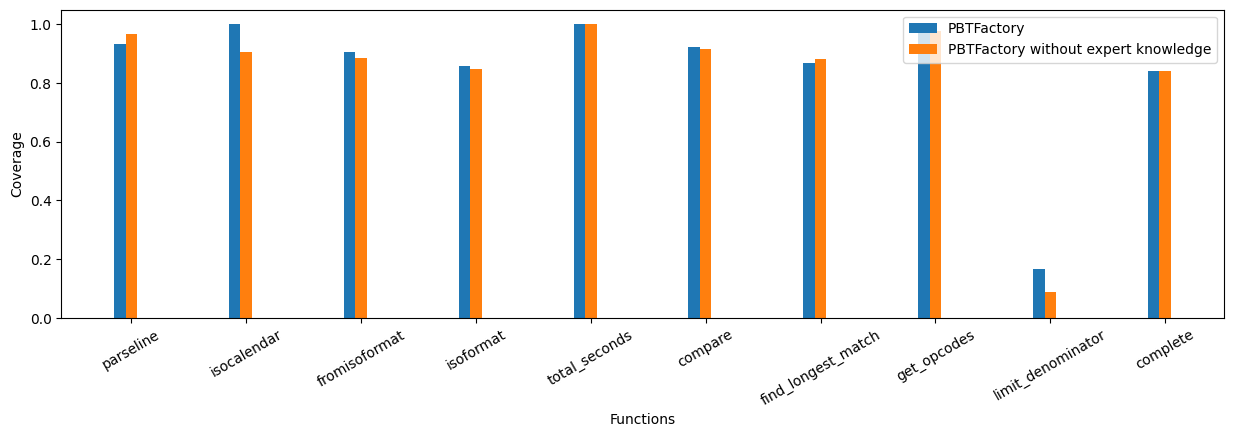

In [13]:
# Figure 4
def load_data(num_of_runs):
    data = OrderedDict()
    data["PBTFactory"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib", num_of_runs)
    data["PBTFactory without expert knowledge"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib_without_expert_knowledge", num_of_runs)
    return data
    
create_plot(load_data, num_of_runs, "mutation_score", "", "Functions", "Mutation Score")
create_plot(load_data, num_of_runs, "coverage", "", "Functions", "Coverage")

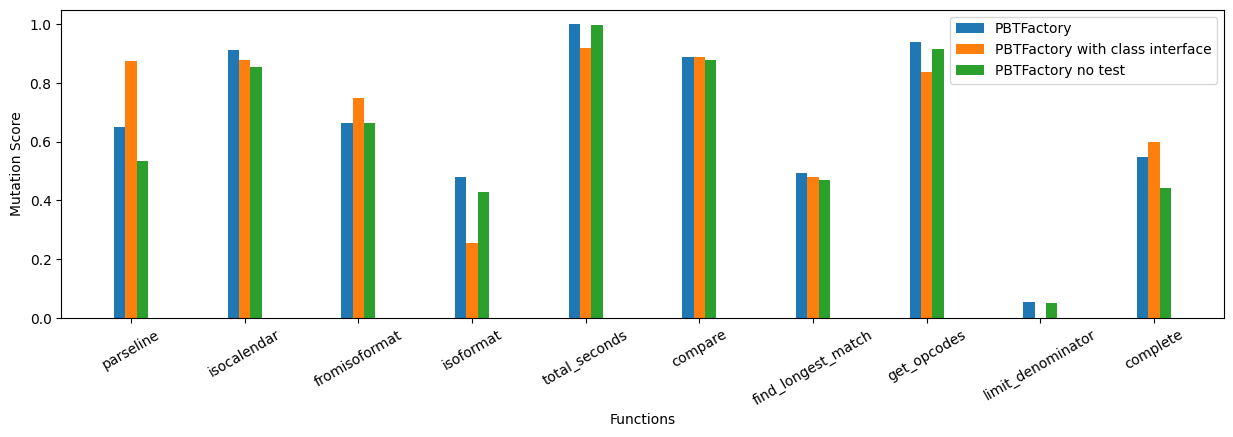

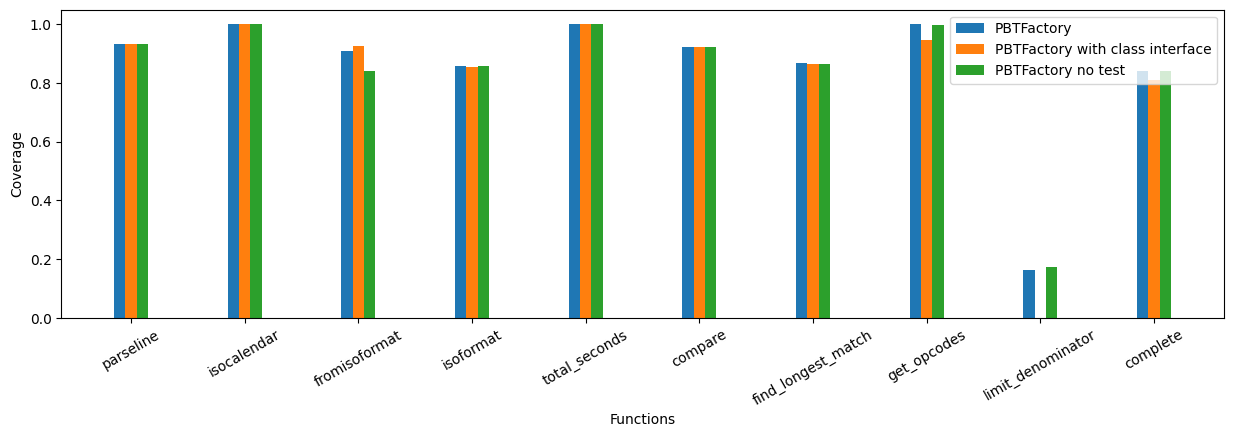

In [14]:
# Figure 5
def load_data(num_of_runs):
    data = OrderedDict()
    data["PBTFactory"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib", num_of_runs)
    data["PBTFactory with class interface"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib_with_class_interface", num_of_runs)
    data["PBTFactory no test"] = load_from_folder("result_pub/stdlib/PBTFactory_stdlib_no_test", num_of_runs)
    return data
    
create_plot(load_data, num_of_runs, "mutation_score", "", "Functions", "Mutation Score")
create_plot(load_data, num_of_runs, "coverage", "", "Functions", "Coverage")